In [1]:
import json
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras import initializers

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(42)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

initializers_list = [
    initializers.RandomNormal,
    initializers.RandomUniform,
    initializers.TruncatedNormal,
    initializers.VarianceScaling,
    initializers.GlorotNormal,
    initializers.GlorotUniform,
    initializers.HeNormal,
    initializers.HeUniform,
    initializers.LecunNormal,
    initializers.LecunUniform,
    initializers.Orthogonal,
]

for initializer in initializers_list:
    print(f"Running {initializer}")

    for iteration in range(2):
        # In order to get same results across multiple runs from an initializer,
        # you can specify a seed value.
        result = float(initializer(seed=42)(shape=(1, 1)))
        print(f"\tIteration --> {iteration} // Result --> {result}")
    print("\n")


Running <class 'keras.src.initializers.initializers.RandomNormal'>
	Iteration --> 0 // Result --> 0.000790853810030967
	Iteration --> 1 // Result --> 0.000790853810030967


Running <class 'keras.src.initializers.initializers.RandomUniform'>
	Iteration --> 0 // Result --> -0.02175668440759182
	Iteration --> 1 // Result --> -0.02175668440759182


Running <class 'keras.src.initializers.initializers.TruncatedNormal'>
	Iteration --> 0 // Result --> 0.000790853810030967
	Iteration --> 1 // Result --> 0.000790853810030967


Running <class 'keras.src.initializers.initializers.VarianceScaling'>
	Iteration --> 0 // Result --> 0.017981600016355515
	Iteration --> 1 // Result --> 0.017981600016355515


Running <class 'keras.src.initializers.initializers.GlorotNormal'>
	Iteration --> 0 // Result --> 0.017981600016355515
	Iteration --> 1 // Result --> 0.017981600016355515


Running <class 'keras.src.initializers.initializers.GlorotUniform'>
	Iteration --> 0 // Result --> -0.7536736726760864
	Iterati

In [2]:
from services.load_dataset import load_data

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

In [23]:
from services.ml_modelling import run_xgboost_random_tuning

xgb_param_grid = {
    'n_estimators': [500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, 5, 10, 50, 100],  # used only when use_smote=False 
    'use_smote': [True, False],
    'eval_metric': ['logloss'],
    'use_label_encoder': [False]
}

results, best_model, best_params = run_xgboost_random_tuning(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    X_test=X_test,
    y_test=y_test,
    param_grid=xgb_param_grid,
    n_iter=100
)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random hyperparameter search for XGBoost (100 iterations)...

Iteration 1/100
Params: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8, 'gamma': 0, 'use_smote': True, 'eval_metric': 'logloss'} | F1: 0.7045 | Precision: 0.6458 | Recall: 0.7750 | AUC: 0.9552 | Time: 4.91s
Iteration 2/100
Params: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'use_smote': True, 'eval_metric': 'logloss'} | F1: 0.7381 | Precision: 0.7045 | Recall: 0.7750 | AUC: 0.9698 | Time: 6.66s
Iteration 3/100
Params: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 0.8, 'gamma': 1, 'use_smote': False, 'eval_metric': 'logloss', 'scale_pos_weight': 5} | F1: 0.6458 | Precision: 0.5536 | Recall: 0.7750 | AUC: 0.9753 | Time: 5.88s
Iteration 4/100
Params: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8

In [3]:
import json

with open('results/dp_xgboost/hyperparameter_tuning.json', 'r') as f:
    results = json.load(f)

In [13]:
from services.ml_modelling import prepare_flattened_data

X_train_base, y_train_base, scaler = prepare_flattened_data(X_train, y_train, apply_smote=False, fit_scaler=True)
X_train_smote, y_train_smote, _ = prepare_flattened_data(X_train, y_train, apply_smote=True, scaler=scaler)
X_val_proc, y_val_proc, _ = prepare_flattened_data(X_val, y_val, apply_smote=False, scaler=scaler)
X_test_proc, y_test_proc, _ = prepare_flattened_data(X_test, y_test, apply_smote=False, scaler=scaler)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [14]:
from xgboost import XGBClassifier

best_params = max(results, key=lambda x: x['f1'])['params']

train_X = X_train_smote if best_params['use_smote'] else X_train_base
train_y = y_train_smote if best_params['use_smote'] else y_train_base

best_model = XGBClassifier(early_stopping_rounds=15, **best_params)
best_model.fit(
    train_X, train_y,
    eval_set=[(X_val_proc, y_val_proc)],
    verbose=False
)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [15:12:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=15,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

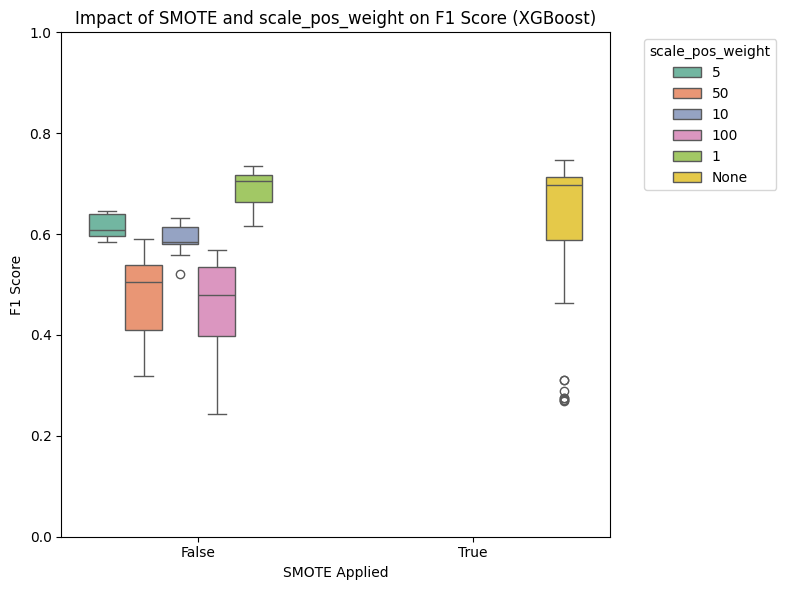

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the DataFrame from all_results
df = pd.DataFrame(results)

# Extract relevant hyperparams
df['use_smote'] = df['params'].apply(lambda p: p['use_smote'])

# Handle scale_pos_weight: only exists when SMOTE is False
def get_scale_weight(p):
    if p['use_smote']:
        return 'None'
    return str(p.get('scale_pos_weight', 'None'))

df['scale_pos_weight'] = df['params'].apply(get_scale_weight)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='use_smote', y='f1', hue='scale_pos_weight', data=df, palette='Set2')

# Optional: Overlay actual data points
#sns.stripplot(x='use_smote', y='f1', hue='scale_pos_weight', data=df,
#              dodge=True, color='black', alpha=0.4, jitter=0.15, linewidth=0)

plt.title("Impact of SMOTE and scale_pos_weight on F1 Score (XGBoost)")
plt.xlabel("SMOTE Applied")
plt.ylabel("F1 Score")
# Remove duplicate handles from stripplot (keep only one set of legend entries)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))  # remove duplicates
plt.legend(title="scale_pos_weight", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(0, 1.0)
plt.show()


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

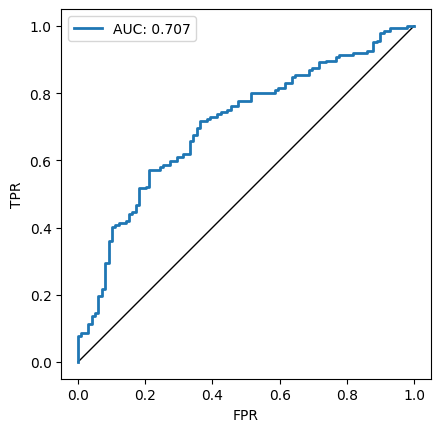

In [17]:
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack import membership_inference_attack as mia
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.data_structures import AttackInputData
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.data_structures import SlicingSpec
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.data_structures import AttackType
import tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.plotting as plotting

# Get member (train) and non-member (test) predictions
train_preds = best_model.predict_proba(X_train_base[:X_test_proc.shape[0]])[:, 1]
test_preds = best_model.predict_proba(X_test_proc)[:, 1]

# TensorFlow Privacy expects (n, num_classes), so reshape
train_probs = np.stack([1 - train_preds, train_preds], axis=1)
test_probs = np.stack([1 - test_preds, test_preds], axis=1)

labels_train = y_train_base[:X_test_proc.shape[0]].astype(int)
labels_test = y_test.astype(int)

# Create an AttackInputData object
attack_input = AttackInputData(
    probs_train=train_probs,
    probs_test=test_probs,
    labels_train=labels_train,
    labels_test=labels_test
)

slicing_spec = SlicingSpec(
    entire_dataset=True,
    by_class=True,
    by_percentiles=True,
    by_classification_correctness=True
)

attacks_result = mia.run_attacks(
    attack_input,
    slicing_spec,
    attack_types=[AttackType.THRESHOLD_ATTACK, AttackType.LOGISTIC_REGRESSION]
)

max_auc_attacker = attacks_result.get_result_with_max_auc()

figure = plotting.plot_roc_curve(max_auc_attacker.roc_curve)